In [1]:
%matplotlib inline
import pandas as pd

In [2]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [3]:
release_dates = pd.read_csv(
    'data/release_dates.csv',
    parse_dates=['date'],
    infer_datetime_format=True,
)
release_dates.head()

/var/folders/4w/0jsdm8g52tx0tw7qlm2bgt2w0000gn/T/ipykernel_29669/1216377476.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  release_dates = pd.read_csv(


,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

In [41]:
christmas_films = release_dates[ (release_dates.title.str.contains('Christmas', na=False)) & (release_dates.country == 'USA') ]
christmas_films

,title,year,country,date
1131,12 Dog Days of Christmas,2014,USA,2014-11-28
1132,12 Dogs of Christmas: Great Puppy Rescue,2012,USA,2012-10-09
2441,2016 Dancing Dolls a Christmas Story,2017,USA,2017-01-15
5627,A Bad Moms Christmas,2017,USA,2017-11-01
5728,A Belle for Christmas,2014,USA,2014-11-04
...,...,...,...,...
376291,The Nightmare Before Christmas,1993,USA,1993-10-29
399661,This Christmas,2007,USA,2007-11-21
428317,What She Wants for Christmas,2012,USA,2012-12-01
430044,White Christmas,1954,USA,1954-10-14


In [42]:
christmas_films['date']

1131     2014-11-28
1132     2012-10-09
2441     2017-01-15
5627     2017-11-01
5728     2014-11-04
            ...    
376291   1993-10-29
399661   2007-11-21
428317   2012-12-01
430044   1954-10-14
438657   2017-11-01
Name: date, Length: 117, dtype: datetime64[ns]

In [43]:
from datetime import datetime
christmas_films['release_month'] = christmas_films['date'].dt.month
christmas_films
# datetime64(, 'M')

/var/folders/4w/0jsdm8g52tx0tw7qlm2bgt2w0000gn/T/ipykernel_29669/1648849292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  christmas_films['release_month'] = christmas_films['date'].dt.month


,title,year,country,date,release_month
1131,12 Dog Days of Christmas,2014,USA,2014-11-28,11
1132,12 Dogs of Christmas: Great Puppy Rescue,2012,USA,2012-10-09,10
2441,2016 Dancing Dolls a Christmas Story,2017,USA,2017-01-15,1
5627,A Bad Moms Christmas,2017,USA,2017-11-01,11
5728,A Belle for Christmas,2014,USA,2014-11-04,11
...,...,...,...,...,...
376291,The Nightmare Before Christmas,1993,USA,1993-10-29,10
399661,This Christmas,2007,USA,2007-11-21,11
428317,What She Wants for Christmas,2012,USA,2012-12-01,12
430044,White Christmas,1954,USA,1954-10-14,10


<Axes: xlabel='release_month'>

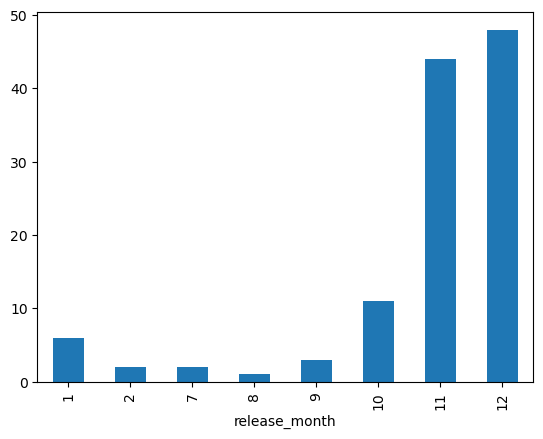

In [46]:
christmas_films.groupby('release_month').size().plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

In [47]:
hobbit_films = release_dates[ (release_dates.title.str.startswith('The Hobbit', na=False)) & (release_dates.country == 'USA') ]
hobbit_films

,title,year,country,date
359932,The Hobbit: An Unexpected Journey,2012,USA,2012-12-14
359997,The Hobbit: The Battle of the Five Armies,2014,USA,2014-12-17
360067,The Hobbit: The Desolation of Smaug,2013,USA,2013-12-13


In [48]:
from datetime import datetime
hobbit_films['release_month'] = hobbit_films['date'].dt.month
hobbit_films
# datetime64(, 'M')

/var/folders/4w/0jsdm8g52tx0tw7qlm2bgt2w0000gn/T/ipykernel_29669/1845898635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hobbit_films['release_month'] = hobbit_films['date'].dt.month


,title,year,country,date,release_month
359932,The Hobbit: An Unexpected Journey,2012,USA,2012-12-14,12
359997,The Hobbit: The Battle of the Five Armies,2014,USA,2014-12-17,12
360067,The Hobbit: The Desolation of Smaug,2013,USA,2013-12-13,12


<Axes: xlabel='release_month'>

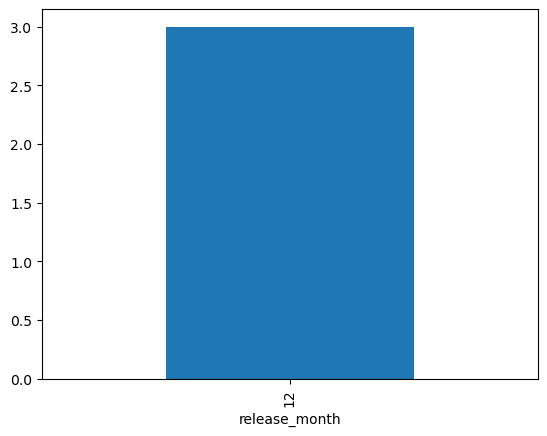

In [49]:
hobbit_films.groupby('release_month').size().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

In [53]:
romance_films = release_dates[ (release_dates.title.str.contains('Romance', na=False)) & (release_dates.country == 'USA') ]
romance_films

,title,year,country,date
862,100% OFF: A Recession-Era Romance,2012,USA,2012-07-04
5995,A California Romance,1922,USA,1922-12-24
6242,A Circus Romance,1916,USA,1916-01-24
6378,A Crooked Romance,1917,USA,1917-09-30
6388,A Cumberland Romance,1920,USA,1920-08-06
...,...,...,...,...
417540,Up Romance Road,1918,USA,1918-06-24
428959,When Romance Rides,1922,USA,1922-04-09
429342,Where Romance Rides,1925,USA,1925-04-28
431657,Wild West Romance,1928,USA,1928-06-10


In [55]:
from datetime import datetime
romance_films['release_day'] = romance_films['date'].dt.day_name()
romance_films
# datetime64(, 'M')

/var/folders/4w/0jsdm8g52tx0tw7qlm2bgt2w0000gn/T/ipykernel_29669/1301514584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  romance_films['release_day'] = romance_films['date'].dt.day_name()


,title,year,country,date,release_day
862,100% OFF: A Recession-Era Romance,2012,USA,2012-07-04,Wednesday
5995,A California Romance,1922,USA,1922-12-24,Sunday
6242,A Circus Romance,1916,USA,1916-01-24,Monday
6378,A Crooked Romance,1917,USA,1917-09-30,Sunday
6388,A Cumberland Romance,1920,USA,1920-08-06,Friday
...,...,...,...,...,...
417540,Up Romance Road,1918,USA,1918-06-24,Monday
428959,When Romance Rides,1922,USA,1922-04-09,Sunday
429342,Where Romance Rides,1925,USA,1925-04-28,Tuesday
431657,Wild West Romance,1928,USA,1928-06-10,Sunday


<Axes: xlabel='release_day'>

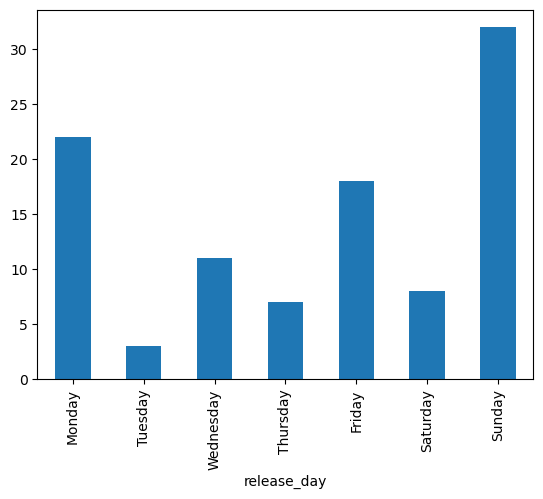

In [66]:
from calendar import day_name
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
romance_films.groupby('release_day').size().reindex(list(day_name)).plot(kind='bar')

In [64]:
list(day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

In [71]:
action_films = release_dates[ (release_dates.title.str.contains('Action', na=False)) & (release_dates.country == 'USA') ].copy()
action_films.head()

,title,year,country,date
6245,A Civil Action,1998,USA,1999-01-08
8377,A Man of Action,1923,USA,1923-06-03
12909,Ace of Action,1926,USA,1926-11-28
13184,Action,1921,USA,1921-09-12
13191,Action Galore,1925,USA,1925-11-03


In [72]:
from datetime import datetime
action_films['release_day'] = action_films['date'].dt.day_name()
action_films.head()
# datetime64(, 'M')

,title,year,country,date,release_day
6245,A Civil Action,1998,USA,1999-01-08,Friday
8377,A Man of Action,1923,USA,1923-06-03,Sunday
12909,Ace of Action,1926,USA,1926-11-28,Sunday
13184,Action,1921,USA,1921-09-12,Monday
13191,Action Galore,1925,USA,1925-11-03,Tuesday


<Axes: xlabel='release_day'>

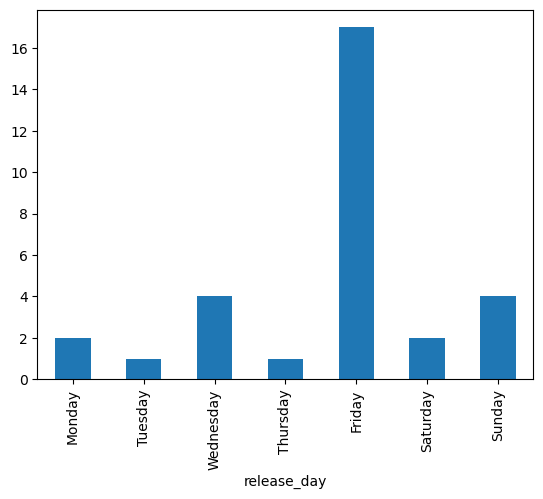

In [73]:
from calendar import day_name
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
action_films.groupby('release_day').size().reindex(list(day_name)).plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [83]:
dench_films_raw = cast[cast['name'] == 'Judi Dench']

In [84]:
usa_films = release_dates[ release_dates.country == 'USA' ].copy()
dench_merged = pd.merge(dench_films_raw, usa_films)
dench_merged_90s = dench_merged[ (dench_merged.year >= 1990) & (dench_merged.year < 2000) ]
dench_merged_90s

# dench_films.head()

,title,year,name,type,character,n,country,date
7,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
8,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
13,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
17,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03
27,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08
30,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14
36,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19
37,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19


### In which months do films with Judi Dench tend to be released in the USA?

In [86]:
dench_merged.head()

,title,year,name,type,character,n,country,date
0,84 Charing Cross Road,1987,Judi Dench,actress,Nora Doel,3.0,USA,1987-02-13
1,A Handful of Dust,1988,Judi Dench,actress,Mrs. Beaver,13.0,USA,1988-06-24
2,A Study in Terror,1965,Judi Dench,actress,Sally,8.0,USA,1966-08-10
3,Casino Royale,2006,Judi Dench,actress,M,4.0,USA,2006-11-17
4,Chocolat,2000,Judi Dench,actress,Armande Voizin,18.0,USA,2001-01-19


<Axes: xlabel='release_month'>

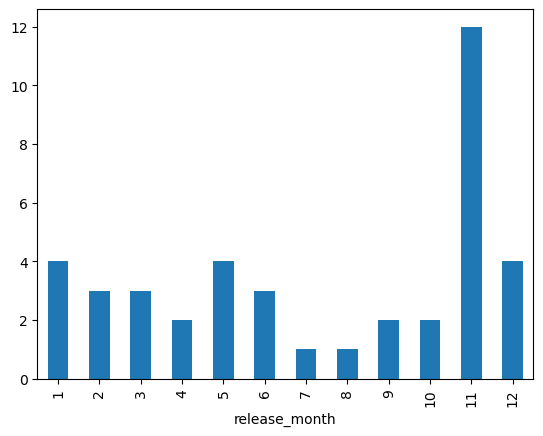

In [89]:
dench_merged['release_month'] = dench_merged['date'].dt.month
dench_merged.groupby('release_month').size().plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

In [90]:
cruise_films_raw = cast[cast['name'] == 'Tom Cruise']

In [91]:
# usa_films = release_dates[ release_dates.country == 'USA' ].copy()
cruise_merged = pd.merge(cruise_films_raw, usa_films)

# dench_films.head()

<Axes: xlabel='release_month'>

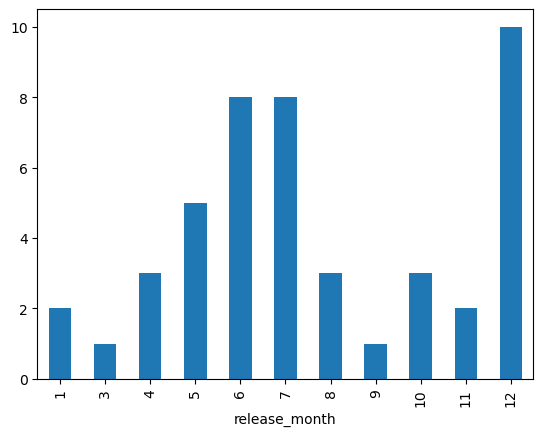

In [92]:
cruise_merged['release_month'] = cruise_merged['date'].dt.month
cruise_merged.groupby('release_month').size().plot(kind='bar')